In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
from google.colab import auth
import gspread
from google.auth import default

In [7]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [8]:
worksheet = gc.open('dep').sheet1
data = worksheet.get_all_values()

In [9]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'INPUT':'float'})
dataset1 = dataset1.astype({'OUTPUT':'float'})

In [10]:
dataset1.head()

,INPUT,OUTPUT
0,1.0,2.0
1,2.0,4.0
2,3.0,6.0
3,4.0,8.0
4,5.0,10.0


In [11]:
X = dataset1[['INPUT']].values
y = dataset1[['OUTPUT']].values

In [12]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.]])

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [14]:
Scaler = MinMaxScaler()

In [15]:
Scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train1 = Scaler.transform(X_train)

In [17]:
ai_brain=Sequential([Dense(7,activation="relu"),Dense(14,activation="relu"),Dense(1)])

In [18]:
ai_brain.compile(optimizer="rmsprop",loss="mse")

In [19]:
ai_brain.fit(X_train,y_train,epochs=3000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 502/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 503/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.0037
Epoch 504/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.0037
Epoch 505/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.0037
Epoch 506/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.0037
Epoch 507/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.0036
Epoch 508/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.0037
Epoch 509/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 510/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.0038
Epoch 511/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.0037
Epoch 512/3000
1/1 [==============================] - 0s 8ms/step - 

In [20]:
loss=pd.DataFrame(ai_brain.history.history)

SACHIN.C
212222230125


<Axes: >

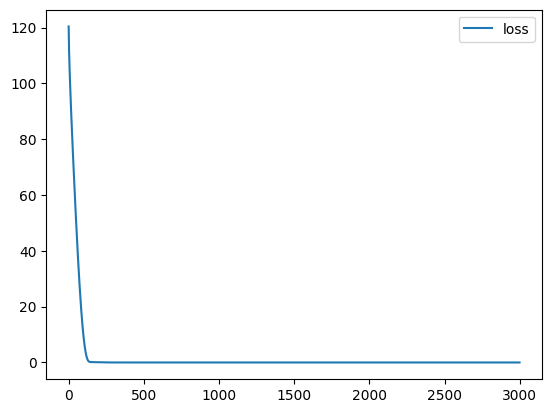

In [21]:
print("SACHIN.C")
print("212222230125")
loss.plot()

In [22]:
x_test1=Scaler.transform(X_test)
ai_brain.evaluate(x_test1,y_test)

1/1 [==============================] - 0s 224ms/step - loss: 372.4052


372.40521240234375

In [23]:
x_n1=[[11]]
x_n1_1=Scaler.transform(x_n1)

In [24]:
ai_brain.predict(x_n1_1)

1/1 [==============================] - 0s 167ms/step


array([[1.6082993]], dtype=float32)